In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [143]:
income_df=pd.read_csv(r'adult_dataset.csv')

In [144]:
income_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [145]:
income_df.replace('?',np.nan,inplace=True)

In [146]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [147]:
income_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [148]:
round(100*(income_df.isna().sum()/len(income_df.index)),3)

age               0.000
workclass         5.639
fnlwgt            0.000
education         0.000
education.num     0.000
marital.status    0.000
occupation        5.660
relationship      0.000
race              0.000
sex               0.000
capital.gain      0.000
capital.loss      0.000
hours.per.week    0.000
native.country    1.790
income            0.000
dtype: float64

In [149]:
income_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [150]:
income_df['workclass'][income_df['workclass']=='?']='Never-worked'

In [151]:
income_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [152]:
income_df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [153]:
income_df=income_df[~income_df['occupation'].isna()]

In [154]:
income_df.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    556
income              0
dtype: int64

In [155]:
income_df['native.country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [156]:
income_df['native.country']=income_df['native.country'].replace(np.nan,'Other country')

In [157]:
income_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [158]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education.num     30718 non-null int64
marital.status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital.gain      30718 non-null int64
capital.loss      30718 non-null int64
hours.per.week    30718 non-null int64
native.country    30718 non-null object
income            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [159]:
income_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
label=LabelEncoder()

In [162]:
cat_cols=income_df.select_dtypes(include='object').columns

In [163]:
income_df[cat_cols]=income_df[cat_cols].apply(label.fit_transform)

In [164]:
income_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,39,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,39,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,39,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,39,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,39,0


In [165]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null int32
fnlwgt            30718 non-null int64
education         30718 non-null int32
education.num     30718 non-null int64
marital.status    30718 non-null int32
occupation        30718 non-null int32
relationship      30718 non-null int32
race              30718 non-null int32
sex               30718 non-null int32
capital.gain      30718 non-null int64
capital.loss      30718 non-null int64
hours.per.week    30718 non-null int64
native.country    30718 non-null int32
income            30718 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.7 MB


In [166]:
income_df['income']=income_df['income'].astype('category')
#income_df['income']=income_df['income'].astype('object')

## Buildng the model

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
y=income_df['income']
X=income_df.drop('income',axis=1)


In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [170]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
31369,36,2,61778,15,10,2,2,0,4,1,0,0,60,39
31013,20,2,130840,0,6,4,5,3,4,1,0,0,40,39
1594,42,1,180985,0,6,2,5,0,4,1,99999,0,40,39
2979,67,1,191800,9,13,0,0,4,2,0,6360,0,35,39
5398,26,2,195105,11,9,4,11,1,3,1,0,0,40,39


In [171]:
y_train.head()

31369    1
31013    0
1594     1
2979     0
5398     0
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [173]:
decision_tree=DecisionTreeClassifier(max_depth=5)

In [174]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [175]:
prediction_train=decision_tree.predict(X_train)

In [176]:
accuracy_score(y_train,prediction_train)

0.8506185471118966

In [177]:
print(classification_report(y_train,prediction_train))

precision    recall  f1-score   support

           0       0.86      0.95      0.91     16136
           1       0.79      0.55      0.65      5366

    accuracy                           0.85     21502
   macro avg       0.83      0.75      0.78     21502
weighted avg       0.84      0.85      0.84     21502



In [178]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz,pydotplus
from sklearn.externals.six import StringIO

In [179]:
features=income_df.columns[1:]

In [267]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

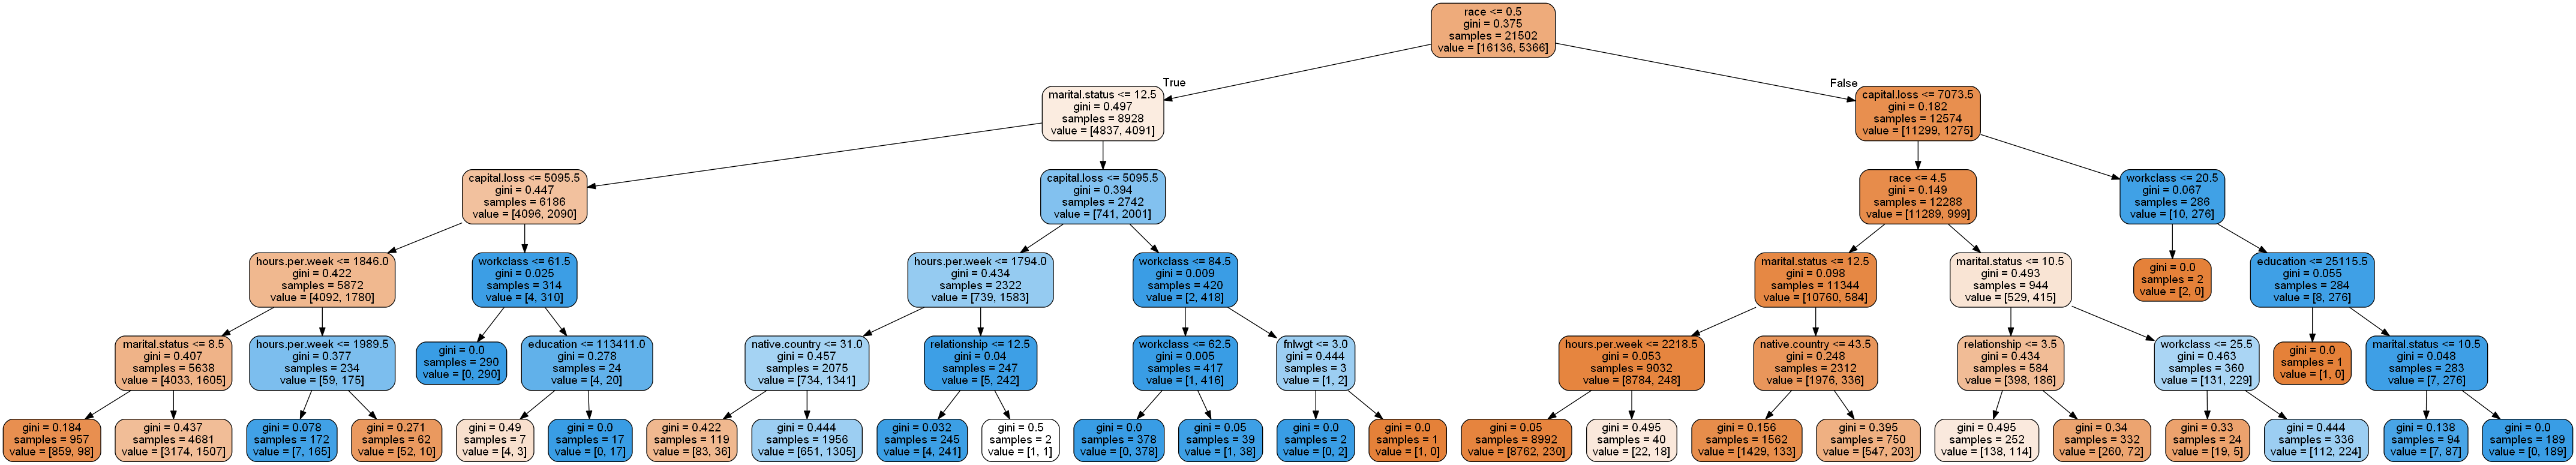

In [181]:
dot_data=StringIO()
export_graphviz(decision_tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [182]:
help(DecisionTreeClassifier)


 |      .. versionchanged:: 0.18
 |         Added float values for fractions.
 |  
 |  min_weight_fraction_leaf : float, optional (default=0.)
 |      The minimum weighted fraction of the sum total of weights (of all
 |      the input samples) required to be at a leaf node. Samples have
 |      equal weight when sample_weight is not provided.
 |  
 |  max_features : int, float, str or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |  
 |          - If int, then consider `max_features` features at each split.
 |          - If float, then `max_features` is a fraction and
 |            `int(max_features * n_features)` features are considered at each
 |            split.
 |          - If "auto", then `max_features=sqrt(n_features)`.
 |          - If "sqrt", then `max_features=sqrt(n_features)`.
 |          - If "log2", then `max_features=log2(n_features)`.
 |          - If None, then `max_features=n_features`.
 |  
 |      Note: 

## Hyperparameter tunning 

## Max Depth

In [183]:
from sklearn.model_selection import GridSearchCV,KFold

In [184]:
folds=KFold(n_splits=5,shuffle=True,random_state=42)

In [185]:
param={'max_depth':(range(1,40))}

In [186]:
deci_tree=DecisionTreeClassifier(criterion='gini',random_state=42)

In [202]:
tree=GridSearchCV(deci_tree,param,cv=folds,scoring='accuracy',verbose=True,return_train_score=True)

In [203]:
tree.fit(X_train,y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   12.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_g

In [204]:
cv_df=pd.DataFrame(tree.cv_results_)

In [205]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010778,0.001723,0.002590,0.000494,1,{'max_depth': 1},0.748431,0.750291,0.747907,0.759767,...,0.750442,0.004876,39,0.750945,0.750480,0.751075,0.748111,0.751599,0.750442,0.001219
1,0.014162,0.000399,0.001597,0.000488,2,{'max_depth': 2},0.820739,0.821669,0.813953,0.829535,...,0.820947,0.005053,17,0.821580,0.821813,0.823276,0.819847,0.822056,0.821714,0.001102
2,0.023537,0.004442,0.001996,0.000893,3,{'max_depth': 3},0.833992,0.834690,0.831628,0.840930,...,0.834760,0.003266,13,0.836172,0.835533,0.836763,0.833798,0.836531,0.835759,0.001065
3,0.022939,0.000642,0.001605,0.000495,4,{'max_depth': 4},0.846547,0.840735,0.838605,0.843721,...,0.842573,0.002709,10,0.845474,0.839544,0.846064,0.844785,0.846355,0.844445,0.002509
4,0.026532,0.000798,0.001397,0.000488,5,{'max_depth': 5},0.850732,0.849337,0.846047,0.848140,...,0.848479,0.001547,5,0.850299,0.848962,0.851529,0.851238,0.850424,0.850491,0.000896


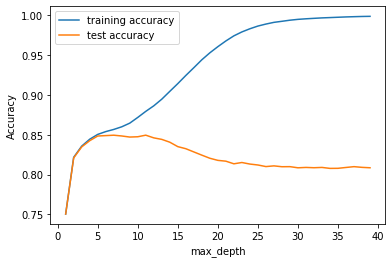

In [207]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_df["param_max_depth"], 
         cv_df["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_df["param_max_depth"], 
         cv_df["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [208]:
tree.best_params_

{'max_depth': 11}

In [244]:
params={'max_depth':range(5,20,5),
        'min_samples_leaf':range(50,150,50),
        'min_samples_split':range(50,150,50),
        'criterion': ["entropy", "gini"]}

In [245]:
tree=GridSearchCV(deci_tree,params,return_train_score=True,verbose=True,cv=folds,scoring='accuracy')

In [246]:
tree.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    5.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_g

In [247]:
tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [248]:
tree.best_score_

0.8523397479223329

In [257]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [258]:
X_train_pred=clf_entropy.predict(X_train)

In [259]:
accuracy_score(y_train,X_train_pred)

0.8580597153753139

In [260]:
X_test_pred=clf_gini.predict(X_test)

In [261]:
accuracy_score(y_test,X_test_pred)

0.8485243055555556

In [262]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [263]:
X_train_pred=clf_entropy.predict(X_train)
X_test_pred=clf_gini.predict(X_test)

In [264]:
print(accuracy_score(y_train,X_train_pred))
print(accuracy_score(y_test,X_test_pred))


0.8580597153753139
0.8490668402777778


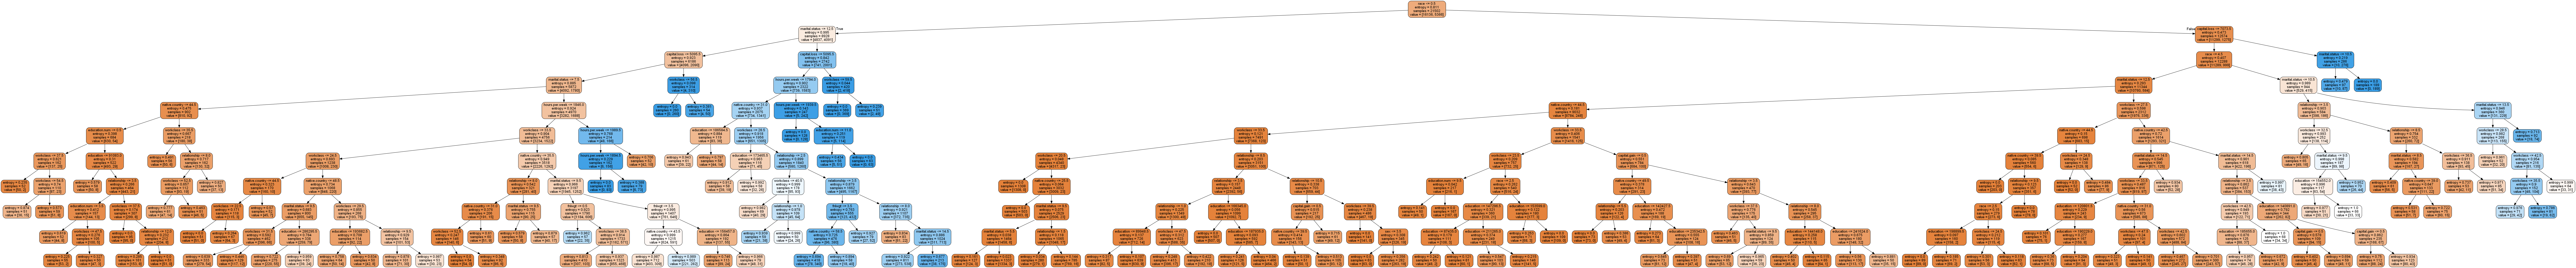

In [279]:
dot_data=StringIO()
export_graphviz(clf_entropy,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [280]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

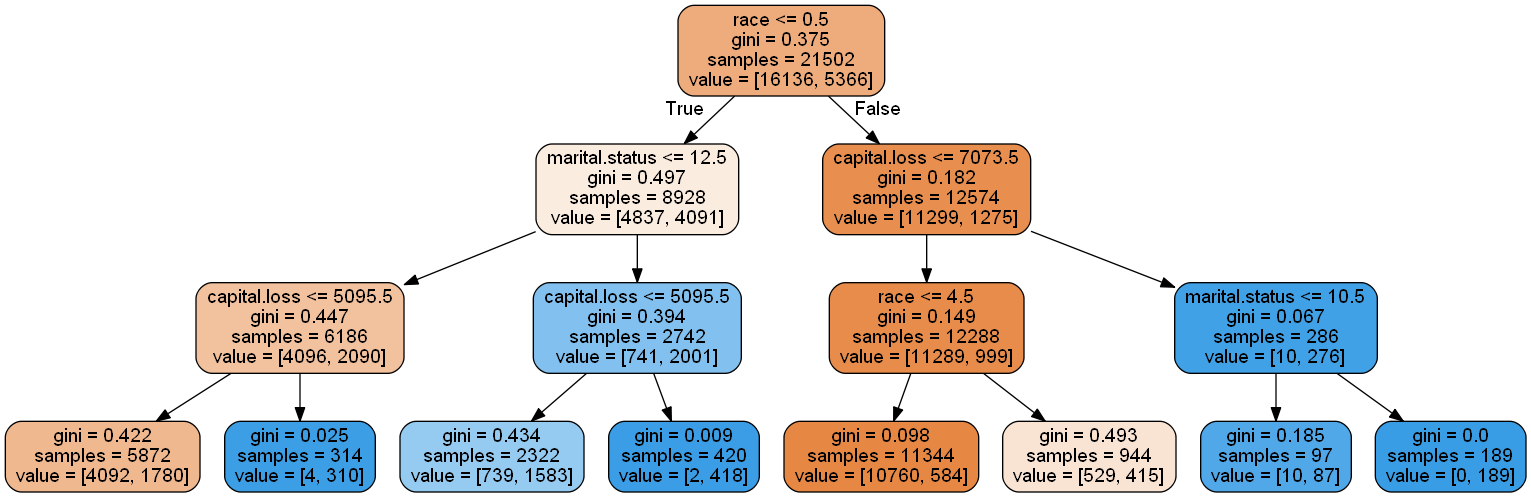

In [281]:
dot_data=StringIO()
export_graphviz(clf_gini,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [285]:
clf_gini.score(X_train,y_train)

0.8356431959817692

In [286]:
clf_gini.score(X_test,y_test)

0.8363715277777778

In [287]:
help(DecisionTreeClassifier)


 |      .. versionchanged:: 0.18
 |         Added float values for fractions.
 |  
 |  min_weight_fraction_leaf : float, optional (default=0.)
 |      The minimum weighted fraction of the sum total of weights (of all
 |      the input samples) required to be at a leaf node. Samples have
 |      equal weight when sample_weight is not provided.
 |  
 |  max_features : int, float, str or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |  
 |          - If int, then consider `max_features` features at each split.
 |          - If float, then `max_features` is a fraction and
 |            `int(max_features * n_features)` features are considered at each
 |            split.
 |          - If "auto", then `max_features=sqrt(n_features)`.
 |          - If "sqrt", then `max_features=sqrt(n_features)`.
 |          - If "log2", then `max_features=log2(n_features)`.
 |          - If None, then `max_features=n_features`.
 |  
 |      Note: 